**EDA**

- Comportamiento & problema

- Cuantitativas:
    - Discreto (conteo): número de hijos
    - Continuo: % de aprobación o % asistencia

- Cualitativas:
    - nominales: sexo (masculino & femenino)
    - ordinales: nivel educativo
    - multinominales: estado civil (soltero, casado, viudo & divorciado)

**Ingeniería de características & preprocesamiento de datos**

- valores ausentes o faltantes o null [completitud] ---> imputación (reemplazar valores faltantes por calculados)
- Valores atípicos ---> (transformación)
- Categorías no previstas  ---> eliminarlas
- sin formato ---> formato
- sin codificar ---> codificarlas
- Diferentes escalas de medida ---> escalarlas (estandarización & normalización)
- predictores correlacionados (multicolinealidad)---> reducción de la dimensionalidad (PCA, FA o LDA)
- predictores no discretizados (convertir a variable cualitativa)---> discretización (K-means, intervalos de igual amplitud, intervalos de igual frecuencia, entropia, etc)
- target (buscamos modelar) desbalanceado---> balancearlos (oversampling , undersampling, Smote and Tomek)
- target no normal - cuantitativas (supuesto estadístico) ---> normalización
- duplicados ---> eliminarlos

**Valores ausentes & técnicas de imputación**

In [1]:
import pandas as pd
import numpy as np

In [2]:
mark2=pd.read_csv("D:/Python/1. Nivel I/6/datos/MarketingDirecto_2.csv", sep=";")

In [3]:
mark2.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN


In [7]:
mark2.isnull().sum()/len(mark2)*100

Edad          0.0
Genero        0.0
Vivienda      0.0
Ecivil        0.0
Ubicacion     0.0
Salario       0.0
Hijos         0.0
Historial    30.3
Catalogos     0.0
Monto         1.3
dtype: float64

**imputación**: es la tarea de reemplazar valores faltantes por valores calculados

**Niveles de pérdida de información**

- 0.1% - 1% valores faltantes su perdida es trivial (insignificante)
- 1% - 5% valores faltante requieren de una técnica para recuperar información
- 5% - 30% se requieren de métodos más sofisticados (modelos de ML) para recuperar información

**tres estrategias frente a la ausencia de valores**

1. eliminar las filas con valores faltantes
2. imputar
3. mantener los valores faltantes ya que existen modelo de aprendizaje que tratan internamente a estos NAs

In [ ]:
################################################
"Regresión"

In [8]:
edad = [25,35,28,29,29]#x
peso = [75,65,68,"NA",72]#y

In [ ]:
y- x

In [11]:
edad = [25,35,28,29]
peso = [75,65,68,72]

In [12]:
df=pd.DataFrame({"edad": edad,
                "peso": peso})

In [13]:
df

,edad,peso
0,25,75
1,35,65
2,28,68
3,29,72


In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lm=LinearRegression()

In [19]:
y_train=df[["peso"]]
x_train=df[["edad"]]

In [20]:
lm.fit(x_train, #predictores
       y_train) #target
#fit(): iniciar un proceso de aprendizaje

LinearRegression()

**¿Cómo calcular ese NA?**

In [21]:
lm.intercept_

array([96.61611374])

In [22]:
lm.coef_

array([[-0.90995261]])

In [25]:
list(lm.intercept_+(lm.coef_*29))

[array([70.22748815])]

In [26]:
NA=70.23

**SimpleImputer()**

In [27]:
from sklearn.impute import SimpleImputer

strategy=

- "mean": imputación por la media
- "median": imputación por la mediana
- "most_frequent": imputación por la moda

In [39]:
imp_media = SimpleImputer(missing_values=np.nan,
                         strategy="mean")

In [29]:
imp_mediana = SimpleImputer(missing_values=np.nan,
                         strategy="median")

In [35]:
imp_moda = SimpleImputer(missing_values=np.nan,
                         strategy="most_frequent")

- **Historial**: variable cualitativa
- **Monto**: variable cualitativa

In [31]:
mark2[["Historial"]]=imp_moda.fit_transform(mark2[["Historial"]])

**fit(): identifica cúal es la categoría de la variable historial más frecuente**

In [36]:
imp_moda.fit(mark2[["Historial"]])

SimpleImputer(strategy='most_frequent')

**transform(): aplica la transformación guardado en el objeto imp_moda**

In [40]:
mark2[["Monto"]]=imp_media.transform(mark2[["Monto"]])

NotFittedError: This SimpleImputer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [37]:
imp_moda.transform(mark2[["Historial"]])

array([['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
    

In [38]:
imp_moda.fit_transform(mark2[["Historial"]])

array([['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Bajo'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Bajo'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Bajo'],
       ['Bajo'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
       ['Medio'],
       ['Medio'],
       ['Alto'],
       ['Alto'],
       ['Alto'],
    

- fit(): aprendizaje
- fit_transform(): aprendizaje + transformación
- transform(): transformación

In [33]:
mark2[["Monto"]]=imp_media.fit_transform(mark2[["Monto"]])

In [34]:
mark2.isnull().sum()/len(mark2)*100

Edad         0.0
Genero       0.0
Vivienda     0.0
Ecivil       0.0
Ubicacion    0.0
Salario      0.0
Hijos        0.0
Historial    0.0
Catalogos    0.0
Monto        0.0
dtype: float64

**Nota**: a los datos train al aplicar fit_transform() he calculado un valor de media de la variable "edad" igual a 35

**Nota**: yo no puedo aplicar a los datos de testeo fit_transform porque podría cambiar el valor de media y ahora ser 37

**Nota final**: para asegurarme que el criterio de imputación se mantenga debo usar fit() o fit_transform() en mis datos de entrenamiento y sólo transform() en mis datos de testeo

**Imputación supervisada**

- cuantitativa & los niveles de pérdida de información >5% se recomienda imputar por regresión (lineal).
- cualitativa & los niveles de perdida de información >5% se recomienda imputar por modelo de clasificación

In [41]:
mark2=pd.read_csv("D:/Python/1. Nivel I/6/datos/MarketingDirecto_2.csv", sep=";")

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [43]:
mark2.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto         13
dtype: int64

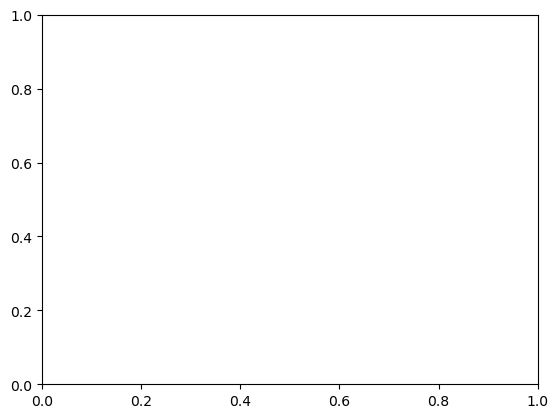

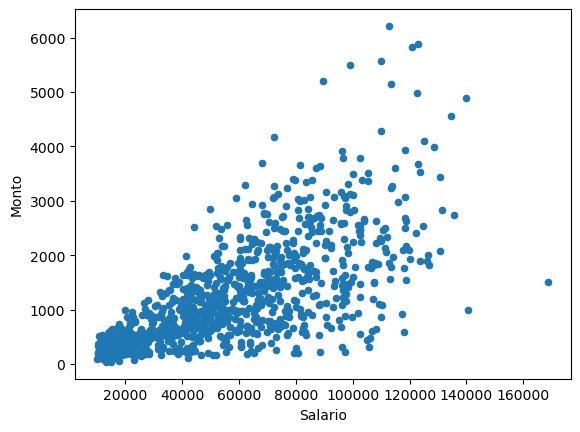

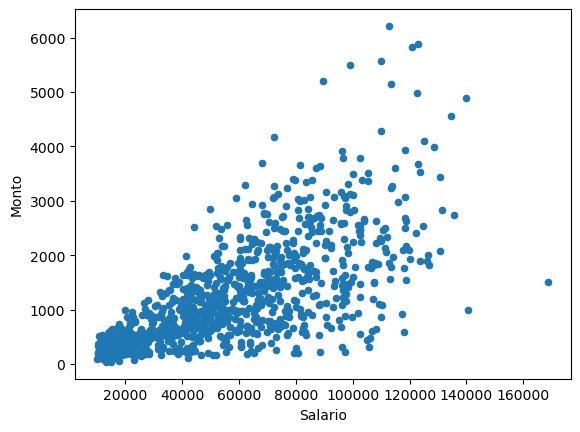

In [47]:
mark2.plot.scatter(x="Salario",y="Monto")
plt.show()

**Nota**: si nosotros queremos recuperar (imputar) los valores de la variable monto en función a salario estas variables tienen que guardar una relación lineal (acercarse a ese tipo de relación)

**Paso 1: crear el conjunto de datos donde la variable monto presente valores incompletos**

In [48]:
es_nulo = pd.isna(mark2.loc[:,"Monto"])

es_nulo: True(valores faltantes) & False(valores completos)

In [51]:
df_nulos=mark2.loc[es_nulo]

In [52]:
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,NaN
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,NaN
132,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,NaN
137,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,NaN
142,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,NaN


**Paso 2: crear el conjunto de datos donde la variable monto presente valores completos**

In [53]:
es_nulo2=es_nulo.replace({True:False, False:True})

es_nulo2: True (valores completos) & False (valores faltantes)

In [54]:
df_data= mark2.loc[es_nulo2]

In [55]:
df_data.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Adulta,Femenino,Propia,Soltero,Lejos,47500,0,Alto,6,755.0
1,Media,Masculino,Alquilada,Soltero,Cerca,63600,0,Alto,6,1318.0
2,Joven,Femenino,Alquilada,Soltero,Cerca,13500,0,Bajo,18,296.0
3,Media,Masculino,Propia,Casado,Cerca,85600,1,Alto,18,2436.0
5,Joven,Masculino,Propia,Casado,Cerca,30400,0,Bajo,6,495.0


**Paso 3: imputación por modelo de regresión**

In [57]:
x= df_data[["Salario"]]
y= df_data[["Monto"]]

**¿A qué DataFrame vamos a imputar?** df_nulos

In [58]:
x_test = df_nulos[["Salario"]]
y_test = df_nulos[["Monto"]]

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regresion=LinearRegression()

In [61]:
regresion.fit(x,y)

LinearRegression()

**Nota**: el objeto "regresion" guarda el modelo entrenado por fit()

In [62]:
df_nulos[["Monto"]]=np.round(regresion.predict(x_test),0)

<ipython-input-62-94170be4456a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos[["Monto"]]=np.round(regresion.predict(x_test),0)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [63]:
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
4,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1491.0
15,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,1814.0
132,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,405.0
137,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,1167.0
142,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,2268.0


**Paso 4: reset index**

In [64]:
df_nulos = df_nulos.reset_index(drop=True)

In [65]:
df_data = df_data.reset_index(drop=True)

**Paso 5: concatenar (unir los dataframe)**

In [66]:
df_imputados = pd.concat([df_nulos,df_data],axis=0)

In [67]:
df_imputados.isnull().sum()

Edad           0
Genero         0
Vivienda       0
Ecivil         0
Ubicacion      0
Salario        0
Hijos          0
Historial    303
Catalogos      0
Monto          0
dtype: int64

**Historial - variable cualitativa ordinal**

**Paso 1**

In [69]:
es_nulo = pd.isna(df_imputados.loc[:,"Historial"])
df_nulos = df_imputados.loc[es_nulo]
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
1,Media,Femenino,Propia,Casado,Lejos,83100,1,NaN,12,1814.0
2,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,NaN,6,405.0
5,Media,Masculino,Propia,Casado,Cerca,53700,1,NaN,12,1167.0
9,Joven,Masculino,Alquilada,Soltero,Cerca,17900,0,NaN,18,378.0
12,Joven,Femenino,Alquilada,Soltero,Cerca,12400,1,NaN,12,257.0


**Paso 2**

In [70]:
es_nulo2=es_nulo.replace({True:False, False:True})
df_data=df_imputados.loc[es_nulo2]

In [71]:
df_data.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Media,Femenino,Propia,Soltero,Cerca,68400,0,Alto,12,1491.0
3,Media,Femenino,Propia,Soltero,Cerca,53700,3,Bajo,12,1167.0
4,Media,Masculino,Propia,Casado,Lejos,103700,1,Alto,24,2268.0
6,Media,Femenino,Propia,Casado,Cerca,108100,1,Alto,12,2365.0
7,Media,Masculino,Propia,Casado,Cerca,107300,2,Medio,18,2347.0


**Paso 3: imputación por árboles de decisión**

In [ ]:
####################################################################################

In [72]:
y=df_data[["Historial"]]
x=df_data[["Edad","Genero","Ecivil"]]

### Codificación

In [73]:
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder

In [74]:
d=defaultdict(LabelEncoder)

In [75]:
fit=x.apply(lambda x: d[x.name].fit(x))

In [76]:
x=x.apply(lambda x: d[x.name].transform(x))

In [78]:
x.head()

,Edad,Genero,Ecivil
0,2,0,1
3,2,0,1
4,2,1,0
6,2,0,0
7,2,1,0


In [79]:
y_test=df_nulos[["Historial"]]
x_test=df_nulos[["Edad","Genero","Ecivil"]]

In [80]:
x_test=x_test.apply(lambda x: d[x.name].transform(x))

In [81]:
x_test.head()

,Edad,Genero,Ecivil
1,2,0,0
2,1,1,1
5,2,1,0
9,1,1,1
12,1,0,1


In [ ]:
###########################################################################

In [82]:
from sklearn.tree import DecisionTreeClassifier

**Nota**: DecisionTreeClassifier() función para implementar el modelo de árboles de decisión

In [83]:
arboles = DecisionTreeClassifier(random_state=2023)

In [84]:
arboles.fit(x,y)

DecisionTreeClassifier(random_state=2023)

In [85]:
df_nulos[["Historial"]]=arboles.predict(x_test)

<ipython-input-85-c3d3f2ab8fde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nulos[["Historial"]]=arboles.predict(x_test)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [86]:
df_nulos.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
1,Media,Femenino,Propia,Casado,Lejos,83100,1,Alto,12,1814.0
2,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,Bajo,6,405.0
5,Media,Masculino,Propia,Casado,Cerca,53700,1,Alto,12,1167.0
9,Joven,Masculino,Alquilada,Soltero,Cerca,17900,0,Bajo,18,378.0
12,Joven,Femenino,Alquilada,Soltero,Cerca,12400,1,Bajo,12,257.0


**¿Por qué genero, edad, estado civil?**

In [88]:
pd.crosstab(df_data["Genero"],df_data["Historial"])

Historial,Alto,Bajo,Medio
Genero,,,
Femenino,94,161,102
Masculino,161,69,110


In [89]:
pd.crosstab(df_data["Ecivil"],df_data["Historial"])

Historial,Alto,Bajo,Medio
Ecivil,,,
Casado,205,52,112
Soltero,50,178,100


In [90]:
pd.crosstab(df_data["Edad"],df_data["Historial"])

Historial,Alto,Bajo,Medio
Edad,,,
Adulta,81,38,50
Joven,7,123,35
Media,167,69,127


In [92]:
df_nulos = df_nulos.reset_index(drop=True)
df_data = df_data.reset_index(drop=True)

In [93]:
df_imputados = pd.concat([df_nulos,df_data],axis=0)

In [94]:
df_imputados.head()

,Edad,Genero,Vivienda,Ecivil,Ubicacion,Salario,Hijos,Historial,Catalogos,Monto
0,Media,Femenino,Propia,Casado,Lejos,83100,1,Alto,12,1814.0
1,Joven,Masculino,Alquilada,Soltero,Cerca,19100,0,Bajo,6,405.0
2,Media,Masculino,Propia,Casado,Cerca,53700,1,Alto,12,1167.0
3,Joven,Masculino,Alquilada,Soltero,Cerca,17900,0,Bajo,18,378.0
4,Joven,Femenino,Alquilada,Soltero,Cerca,12400,1,Bajo,12,257.0


In [95]:
df_imputados.isnull().sum()

Edad         0
Genero       0
Vivienda     0
Ecivil       0
Ubicacion    0
Salario      0
Hijos        0
Historial    0
Catalogos    0
Monto        0
dtype: int64

**Técnicas de balanceo de datos**

In [97]:
#pip install imblearn

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

In [98]:
os.chdir("D:/Python/1. Nivel I/7/datos")

In [99]:
data=pd.read_csv("Grid v1.csv")

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\IPython\core\interactiveshell.py:3185: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [100]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,A1,A,1,0.0,0,0.0,NaN,0.0
1,A2,A,2,0.0,0,0.0,NaN,0.0
2,A3,A,3,0.0,0,0.0,NaN,0.0
3,A4,A,4,0.0,0,0.0,NaN,0.0
4,A5,A,5,0.0,0,0.0,NaN,0.0


- incidentes: número de reclamos por cada registro (punto de señal)
- rsrp: indicador de señal

In [101]:
data=data.loc[(data["rsrp"]<0)]

In [102]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
14400,AA127,AA,127,-115.7500,0,884.696988,01403753_LM_Ancon,10.856694
14949,AB127,AB,127,-112.7500,0,381.359613,01403753_LM_Ancon,11.205094
15498,AC127,AC,127,-118.3750,0,713.387431,01403753_LM_Ancon,8.729160
16046,AD126,AD,126,-115.3750,0,307.311721,01403753_LM_Ancon,9.607077
16596,AE127,AE,127,-118.1875,0,1728.576707,01403753_LM_Ancon,9.835512


In [103]:
data = data.reset_index(drop=True)

In [104]:
data.head()

,Description,Col_Name,Row_Name,rsrp,incidentes,redireccion,best_server,cqi
0,AA127,AA,127,-115.7500,0,884.696988,01403753_LM_Ancon,10.856694
1,AB127,AB,127,-112.7500,0,381.359613,01403753_LM_Ancon,11.205094
2,AC127,AC,127,-118.3750,0,713.387431,01403753_LM_Ancon,8.729160
3,AD126,AD,126,-115.3750,0,307.311721,01403753_LM_Ancon,9.607077
4,AE127,AE,127,-118.1875,0,1728.576707,01403753_LM_Ancon,9.835512


In [105]:
pd.value_counts(data["incidentes"])

0    21601
1     1279
2      167
3       41
4       11
6        2
7        1
5        1
Name: incidentes, dtype: int64

In [108]:
data["incidentes"]=data["incidentes"].replace([2,3,4,5,6,7],1)

In [110]:
pd.value_counts(data["incidentes"])/len(data)*100

0    93.49868
1     6.50132
Name: incidentes, dtype: float64

**Nota**: los datos desbalanceados afectan el proceso de aprendizaje

**Nota**: el balanceo de datos sólo se aplica a los datos de entrenamiento.

In [ ]:
##################################################################

**Particionamiento de los datos**

In [111]:
from sklearn.model_selection import train_test_split

In [113]:
data= data[["rsrp","redireccion","cqi","incidentes"]]

In [114]:
data.head()

,rsrp,redireccion,cqi,incidentes
0,-115.7500,884.696988,10.856694,0
1,-112.7500,381.359613,11.205094,0
2,-118.3750,713.387431,8.729160,0
3,-115.3750,307.311721,9.607077,0
4,-118.1875,1728.576707,9.835512,0


In [115]:
x= data.iloc[:,0:3].values
y= data.iloc[:,3].values #variable a balancear

In [117]:
x_train, x_test, y_train, y_test = train_test_split(x,
                                                   y,
                                                   test_size=0.3,
                                                   random_state=2023)

In [ ]:
#####################################################################

**Under Sampling**

In [119]:
pd.value_counts(y_train)

0    15126
1     1046
dtype: int64

**Nota**: extrae una muestra de la clase mayoritaria

In [120]:
under = NearMiss(sampling_strategy=0.8, version=2)

In [121]:
x_under, y_under = under.fit_resample(x_train,y_train)

In [122]:
pd.value_counts(y_under)

0    1307
1    1046
dtype: int64

In [124]:
round(1307*0.8)

1046

**Nota**: "sampling_strategy=" es un parámetro a optimizar

**Over Sampling**

In [125]:
over = RandomOverSampler(0.8)

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [126]:
x_over, y_over = over.fit_resample(x_train,y_train)

In [127]:
pd.value_counts(y_over)

0    15126
1    12100
dtype: int64

**Smote and Tomek**

In [128]:
st = SMOTETomek(0.8, random_state=2023)

C:\Users\SOCIAL DATA\AppData\Roaming\Python\Python38\site-packages\imblearn\utils\_validation.py:587: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


In [129]:
x_st, y_st = st.fit_resample(x_train,y_train)

In [130]:
pd.value_counts(y_st)

0    13395
1    10369
dtype: int64